## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost. 
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing necessary libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Imputation
from sklearn.impute import SimpleImputer

# Importing models
from sklearn.ensemble import (RandomForestClassifier
                            ,BaggingClassifier
                            ,GradientBoostingClassifier
                            ,AdaBoostClassifier
                            )
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Model Tuning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Performance metrics
import sklearn.metrics as metrics
from sklearn.metrics import (classification_report
                             ,confusion_matrix
                             ,recall_score
                             ,accuracy_score
                             ,precision_score
                             ,f1_score)

import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Pipeline functions
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
path = 'C:\\Users\\Garrett\\OneDrive\\Documents\\DS Certification\\Renewind Project\\'

# read the data
df = pd.read_csv(path+'Train.csv')
# returns the first 5 rows
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,...,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0


## Data Overview

- Observations
- Sanity checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

In [5]:
# Finding all the null values in the first two columns to confirm that they aren't on the same records
df[df.isnull().any(axis=1)]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
89,NaN,-3.961403,2.787804,-4.712526,-3.007329,-1.541245,-0.881148,1.476656,0.574700,-1.100884,...,-8.326069,-5.140552,1.121314,-0.305907,5.315007,3.750044,-5.631174,2.372485,2.195956,0
613,-2.048681,NaN,-1.623885,-3.324224,0.152256,0.600157,-1.812802,0.852194,-1.522600,0.211071,...,3.264218,2.379064,-2.457084,1.719365,2.537010,1.701780,-1.434535,0.597365,0.739238,0
2236,-3.760658,NaN,0.194954,-1.637958,1.261479,-1.573947,-3.685700,1.575651,-0.309823,-0.137656,...,7.620821,1.695061,-3.956354,2.707644,4.657387,1.619307,-5.537285,1.246650,-1.162793,0
2508,-1.430888,NaN,0.659576,-2.876402,1.150137,-0.785760,-1.560174,2.898635,-2.346989,-0.217607,...,6.279266,3.323914,-4.047760,3.119220,3.336260,0.603524,-3.781725,-0.157478,1.503298,0
4653,5.465769,NaN,4.540947,-2.916550,0.399752,2.798925,0.029477,-7.334071,1.122874,1.695269,...,-1.535753,4.596212,-4.103525,4.295524,0.152672,-3.726700,6.562692,0.706452,-0.461696,0
5941,NaN,1.008391,1.227702,5.397082,0.064230,-2.706919,-2.028368,0.534046,3.006797,-2.362238,...,1.869502,-3.115298,-0.550197,1.713781,-2.256960,0.410992,-3.434400,-1.299388,-1.768734,0
6317,NaN,-5.205346,1.997652,-3.707913,-1.042200,-1.593126,-2.653309,0.852280,-1.310489,2.406924,...,3.074149,-0.067649,-0.277521,3.196840,7.016205,1.302334,-4.580096,2.956254,-2.363150,0
6464,NaN,2.146202,5.004415,4.192063,1.427887,-6.438263,-0.931339,3.794120,-0.683032,-0.738941,...,5.231472,-5.113312,1.745687,2.587189,3.990777,0.610716,-4.273457,1.864568,-3.599079,0
6810,-2.631454,NaN,2.330188,1.090080,0.603973,-1.139383,-0.690121,-1.358935,0.355568,-1.189176,...,-0.950215,0.209717,0.448728,1.046063,0.536937,0.763187,1.728621,1.885821,-1.701774,0
7073,NaN,2.534010,2.762821,-1.673718,-1.942214,-0.029961,0.911323,-3.199743,2.948610,-0.413229,...,-4.887077,-2.611526,-1.500807,2.036186,-0.828979,-1.369591,0.572366,-0.132183,-0.322007,0


## Exploratory Data Analysis (EDA)

### Plotting histograms and boxplots for all the variables

In [6]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Plotting all the features at one go

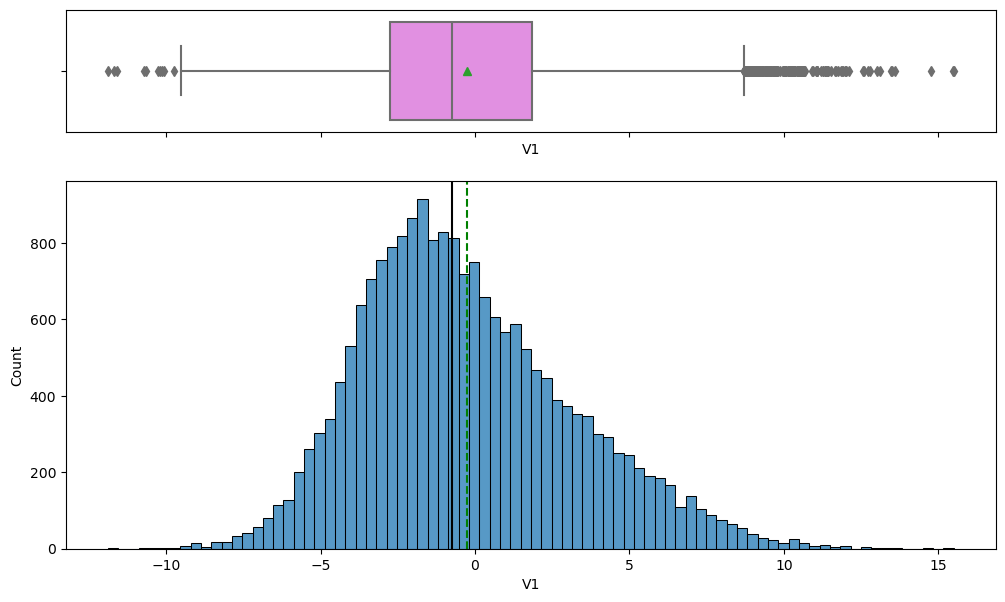

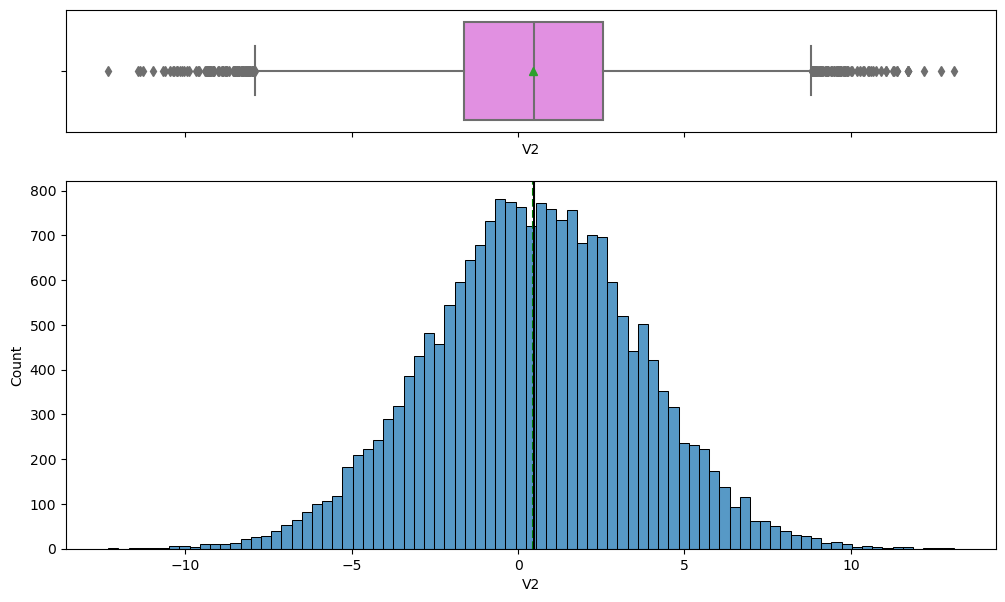

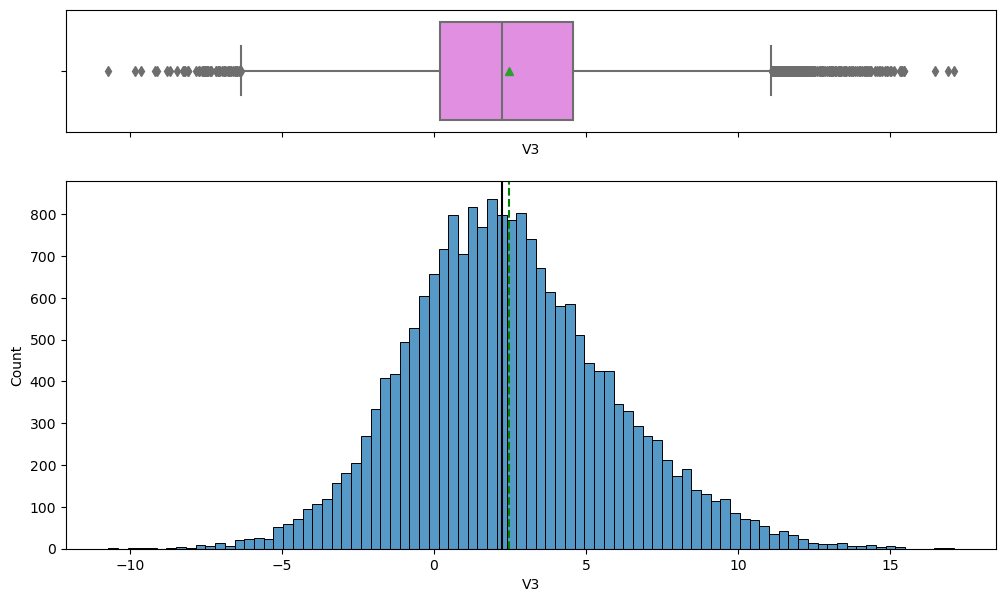

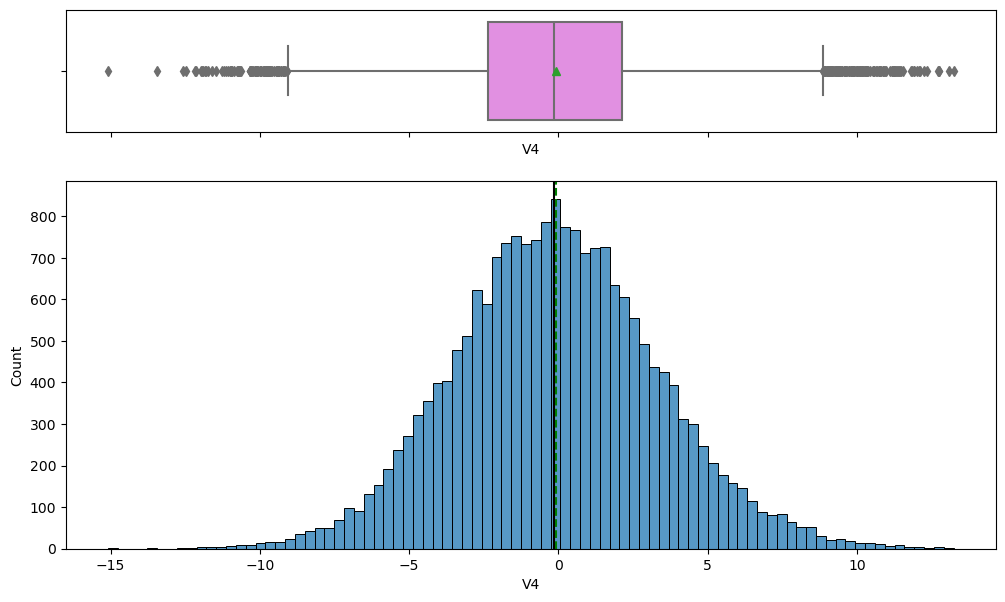

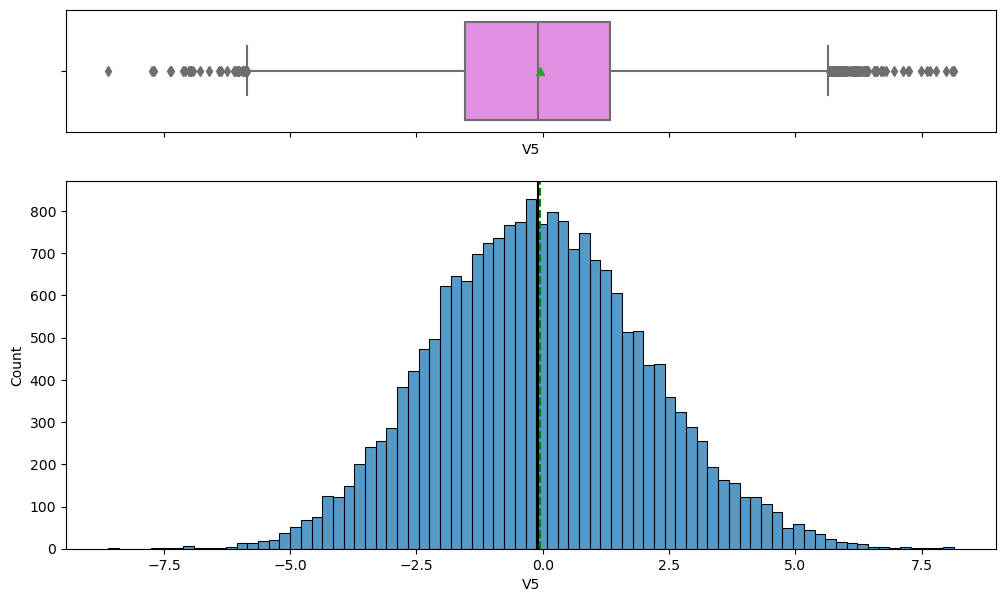

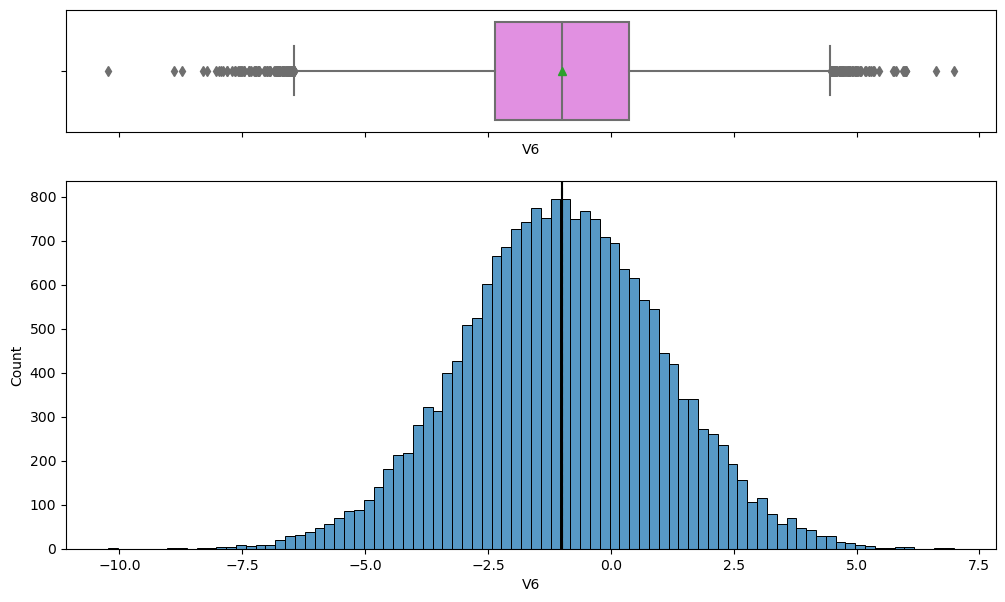

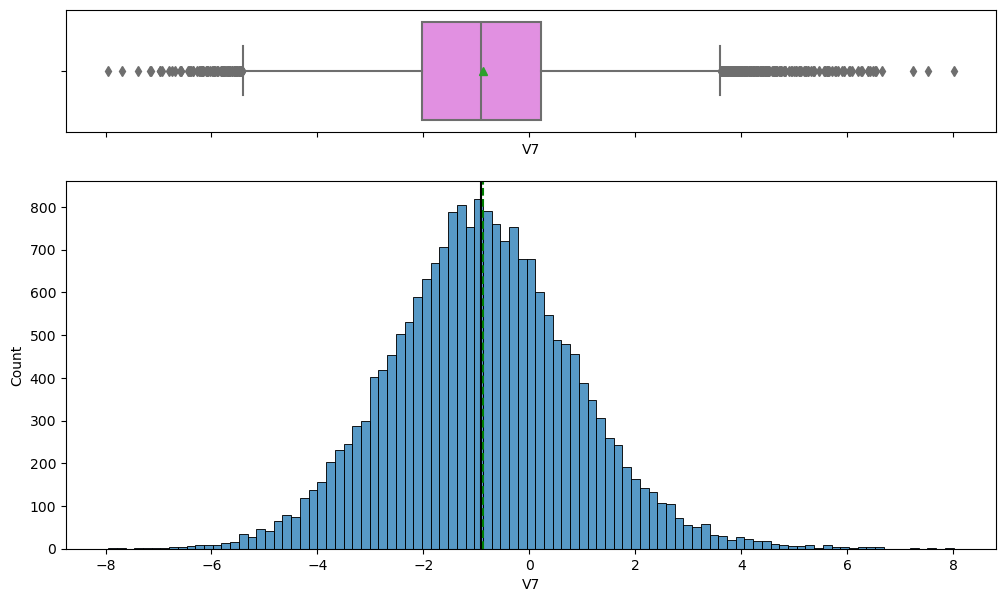

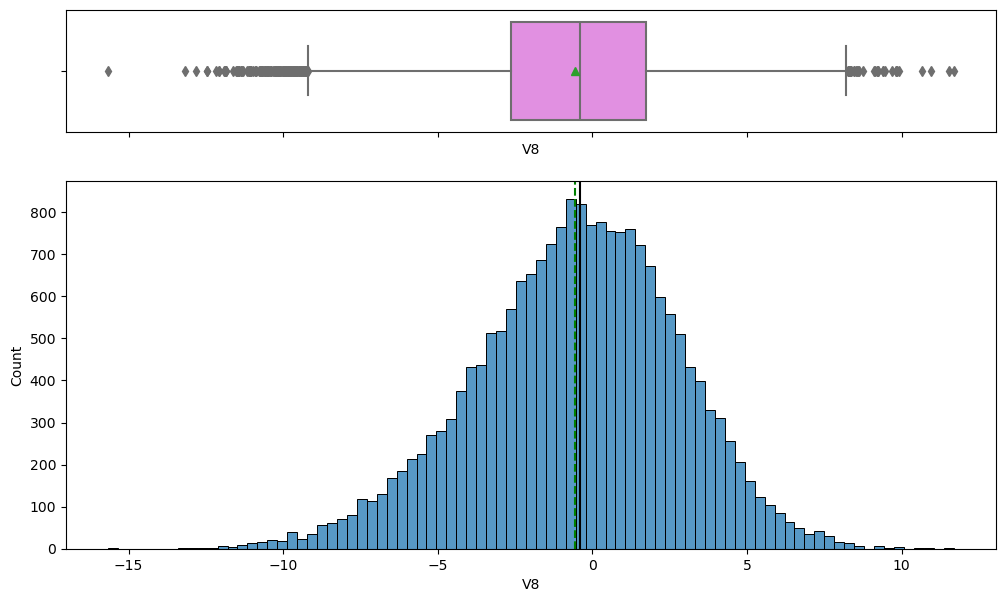

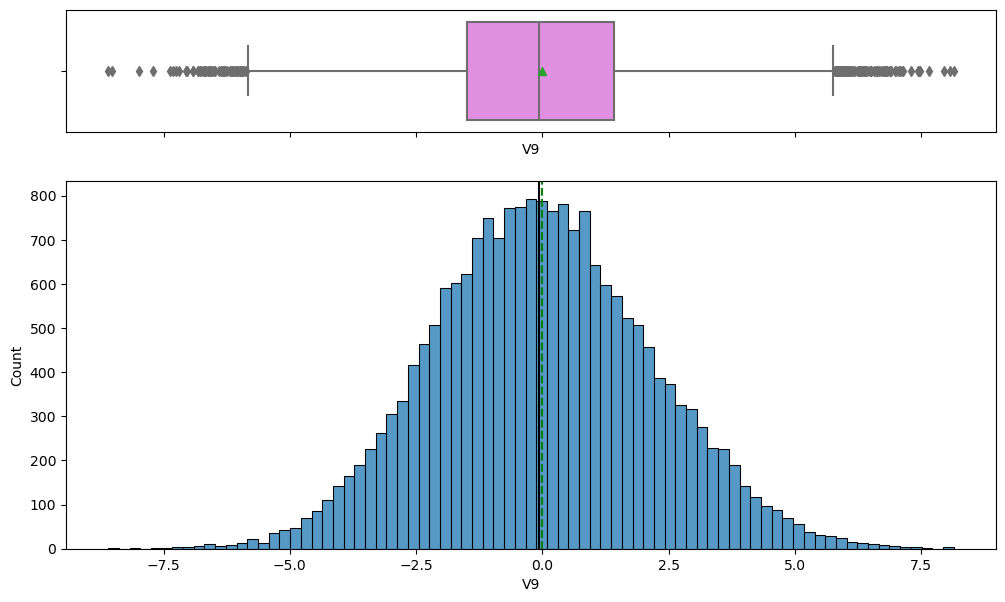

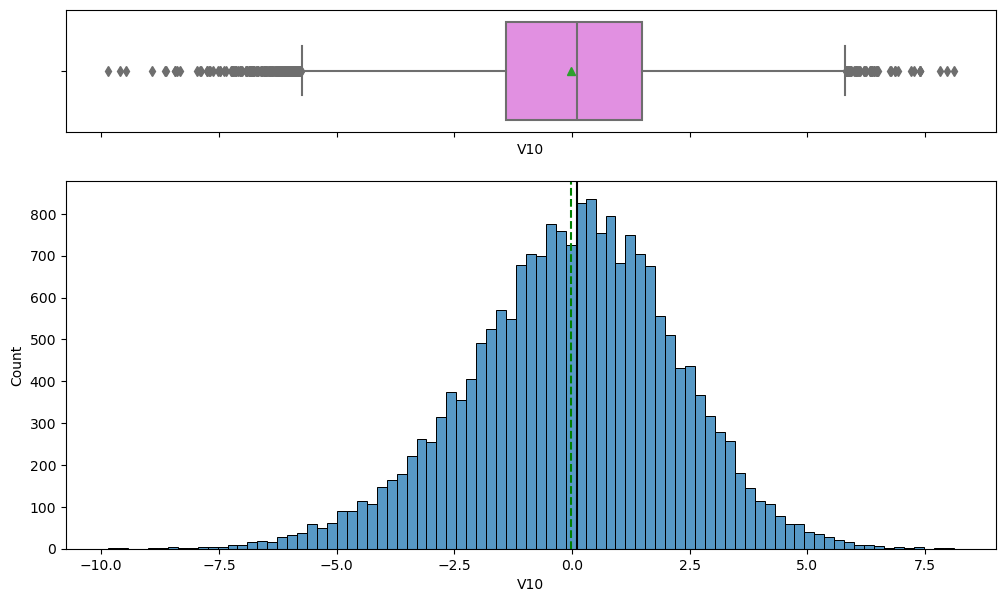

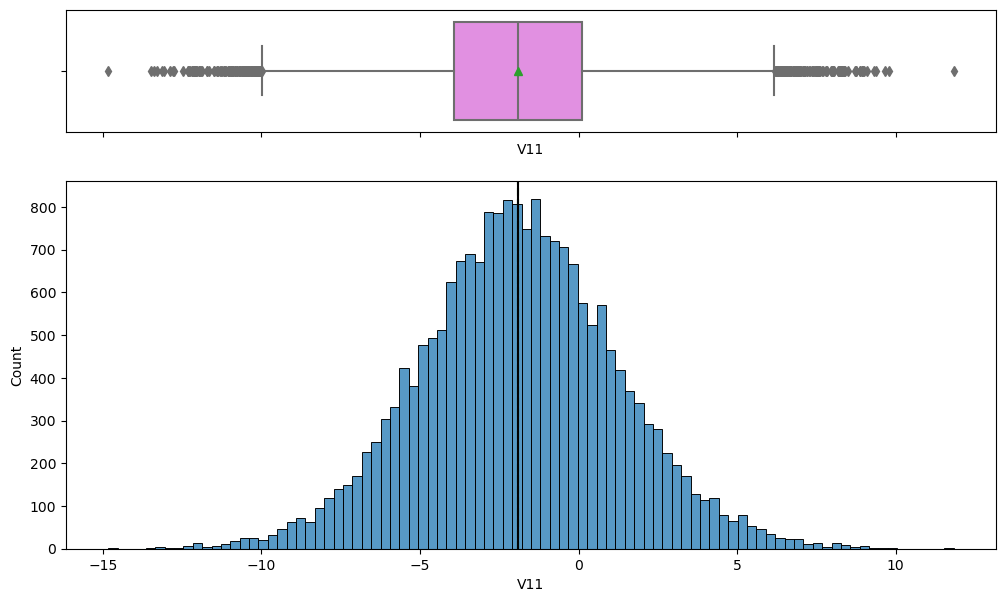

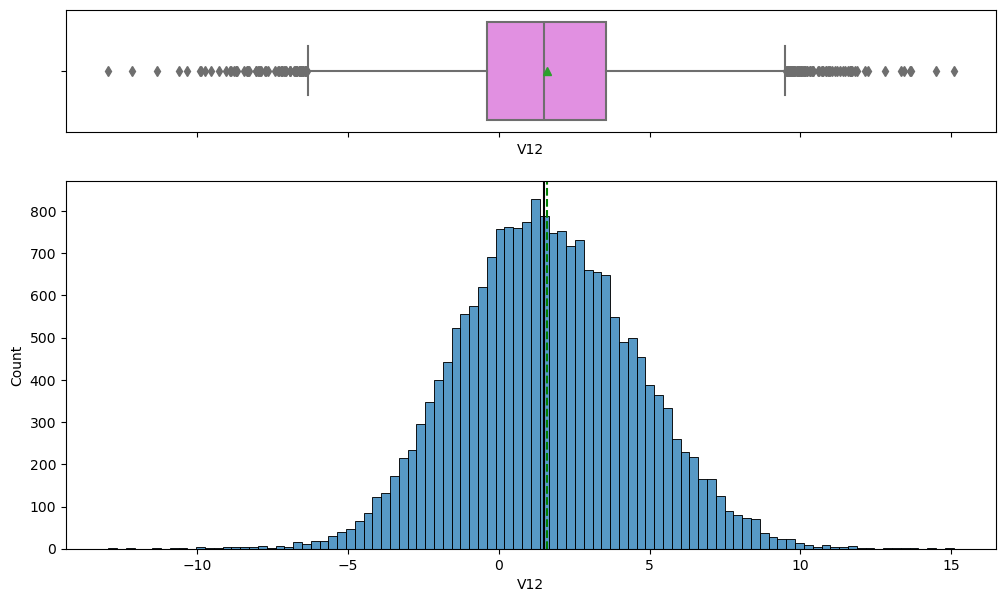

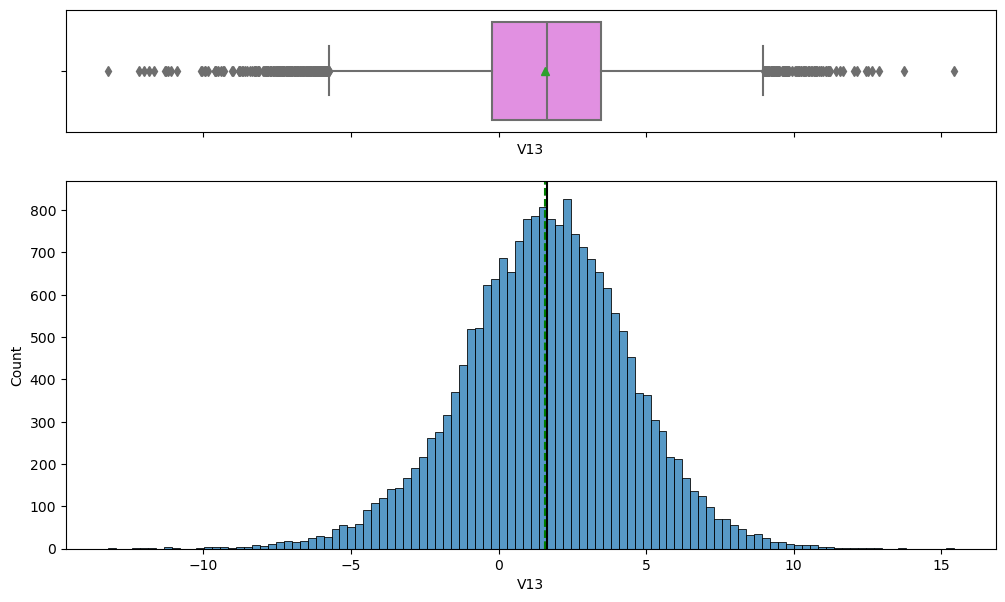

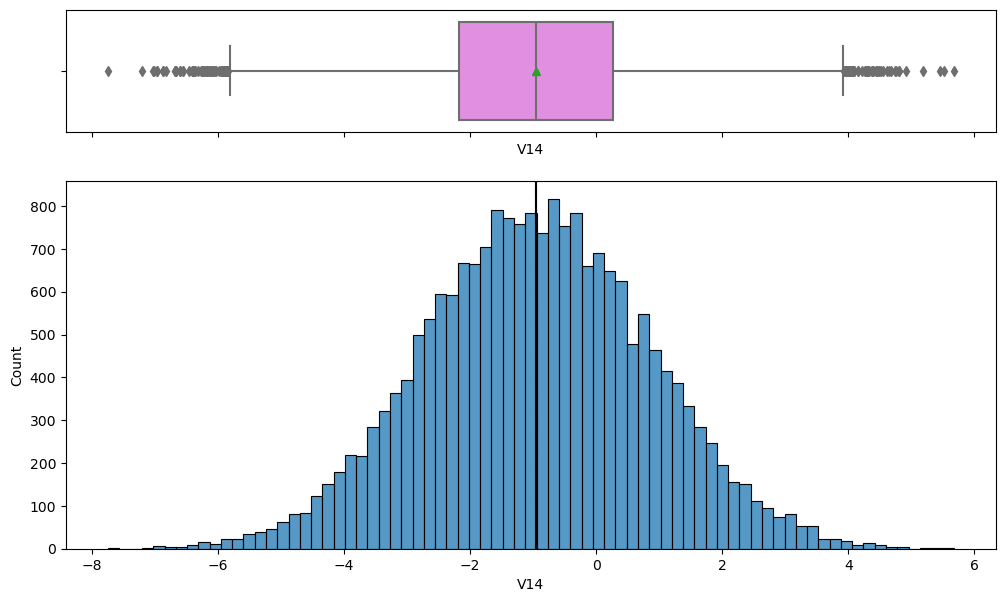

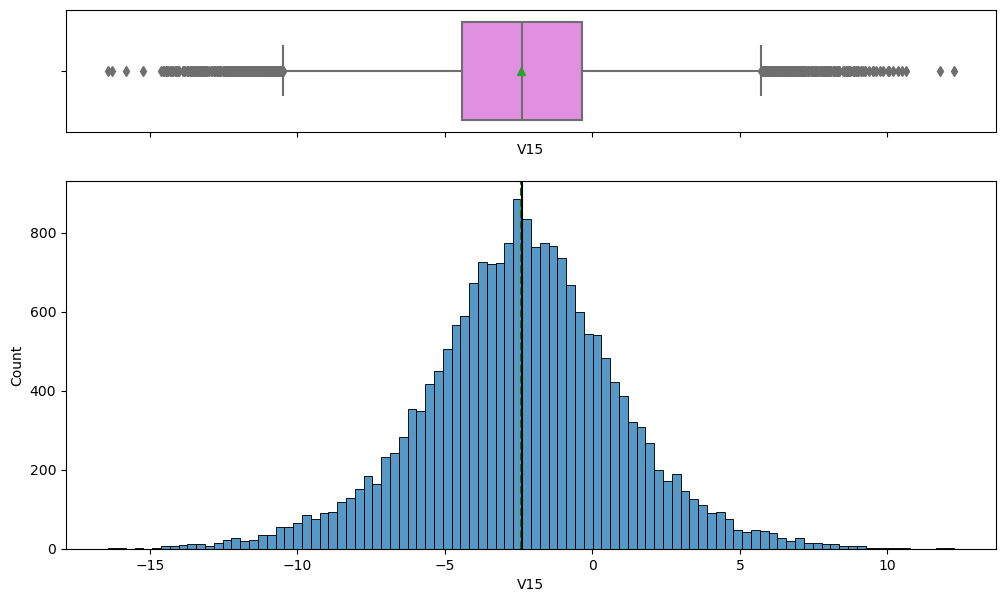

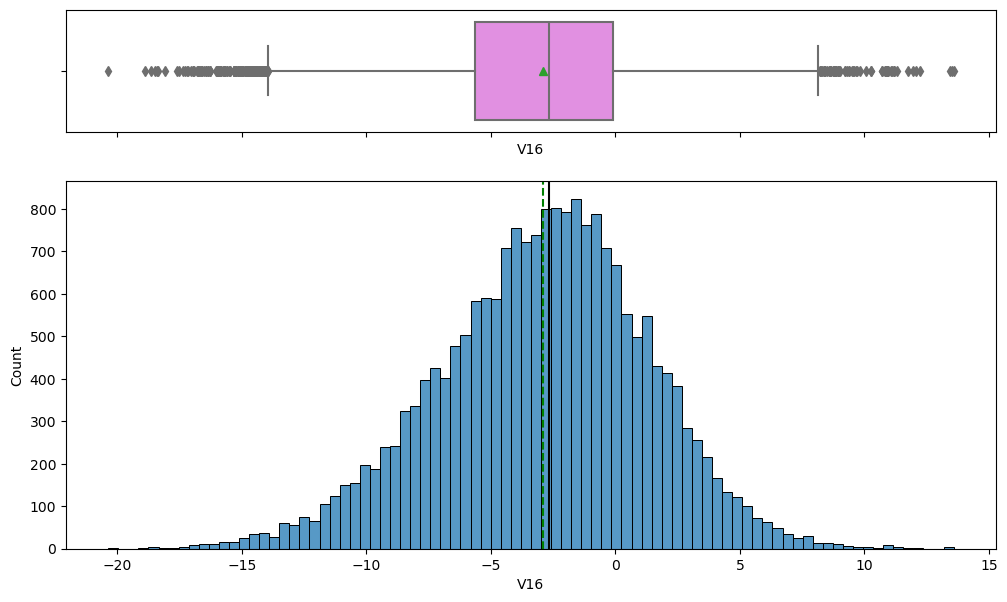

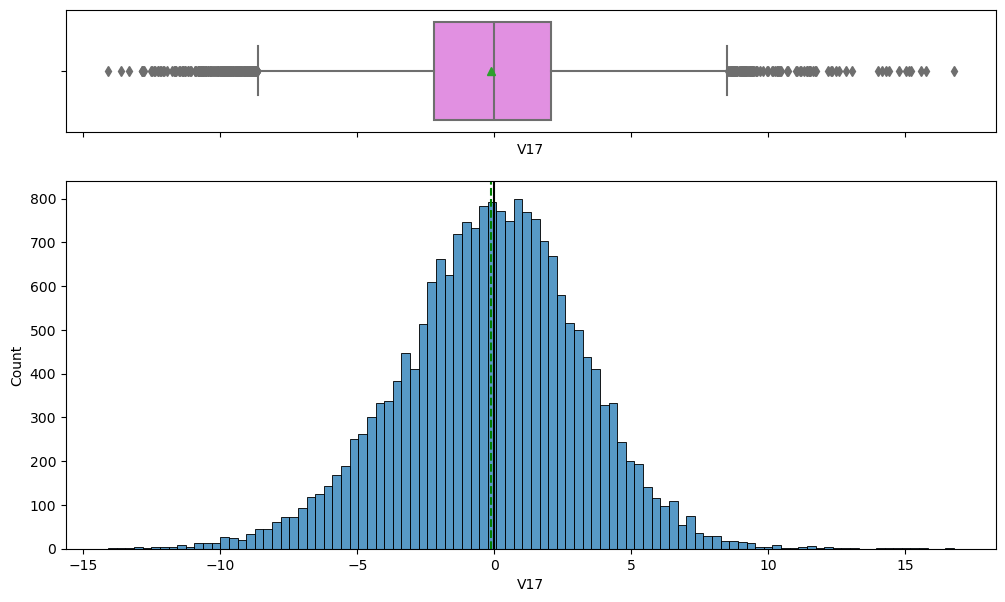

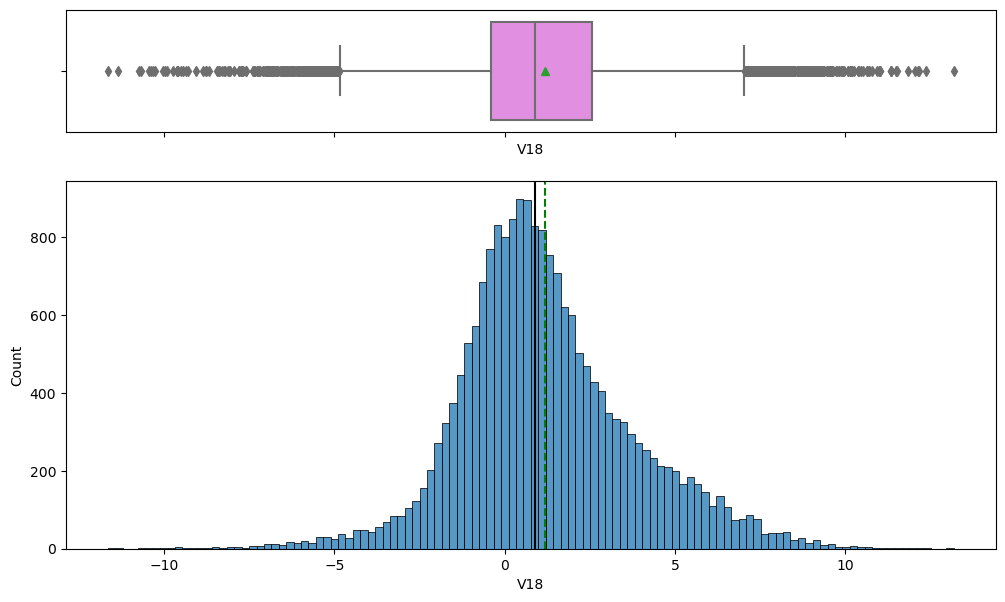

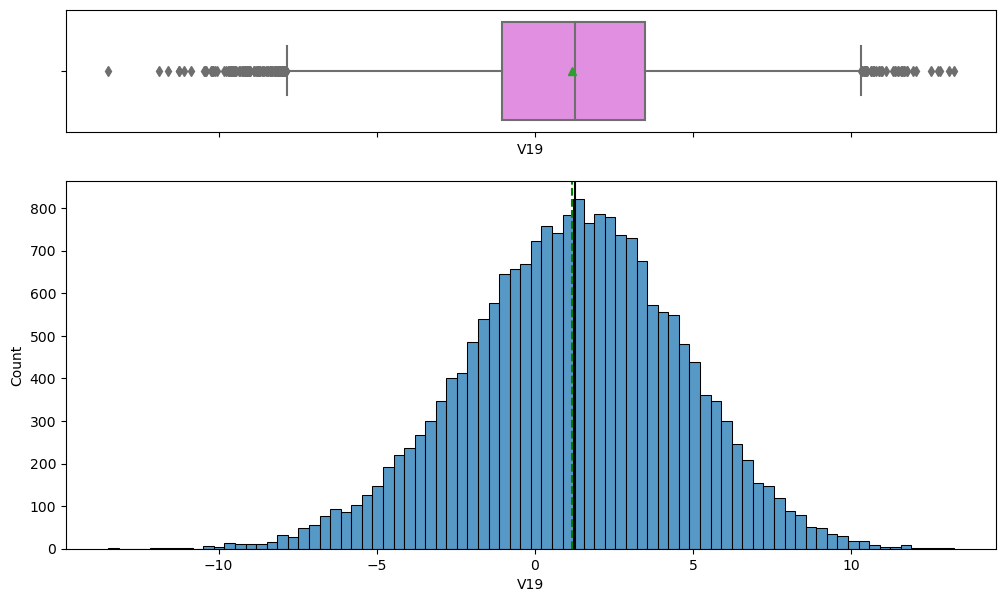

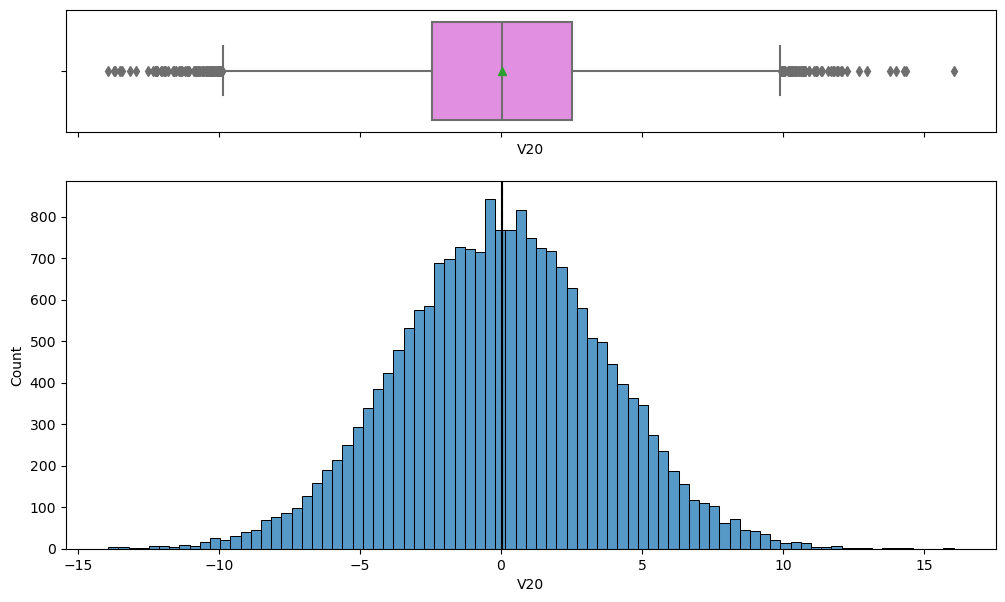

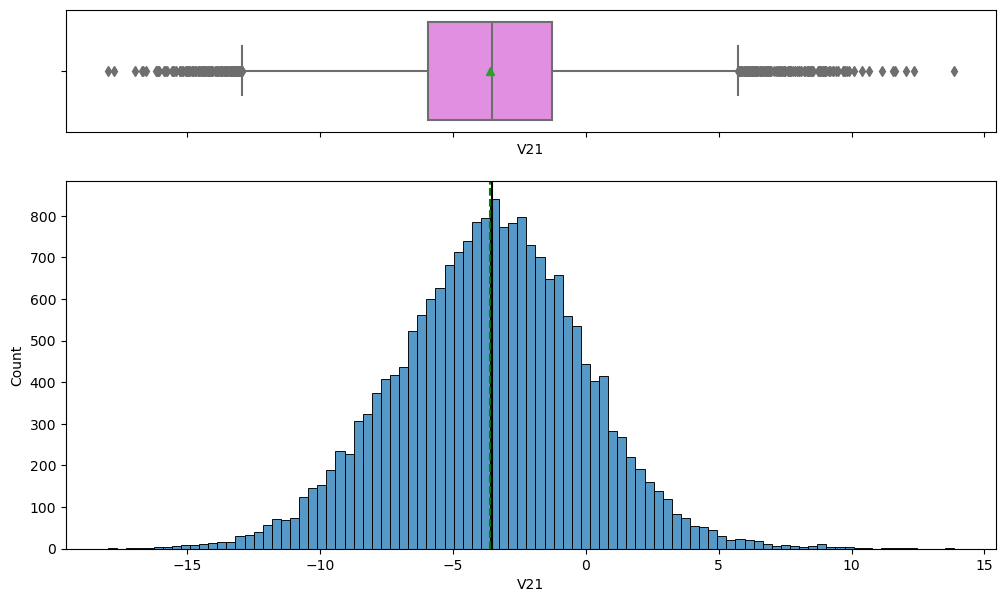

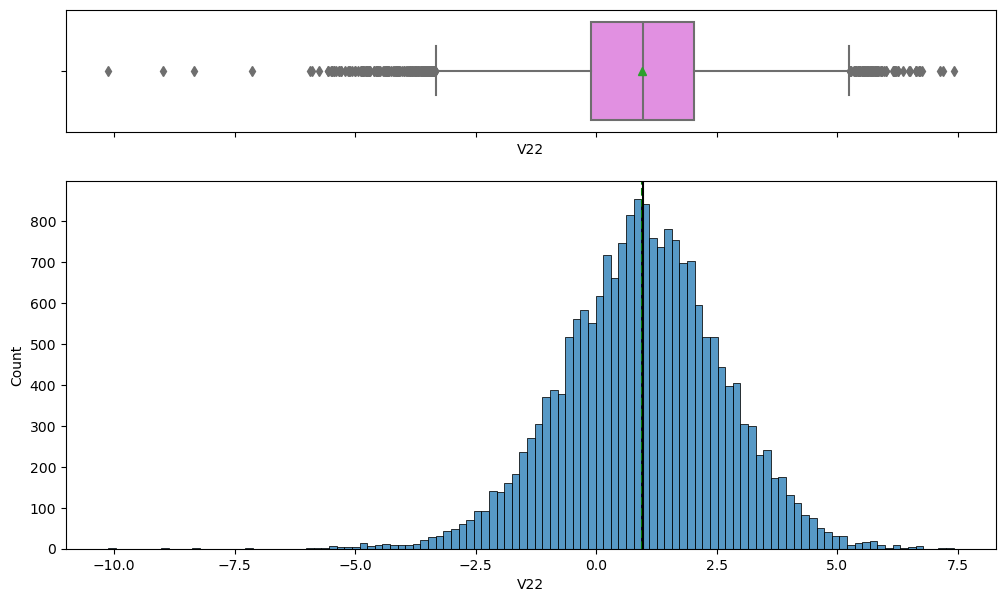

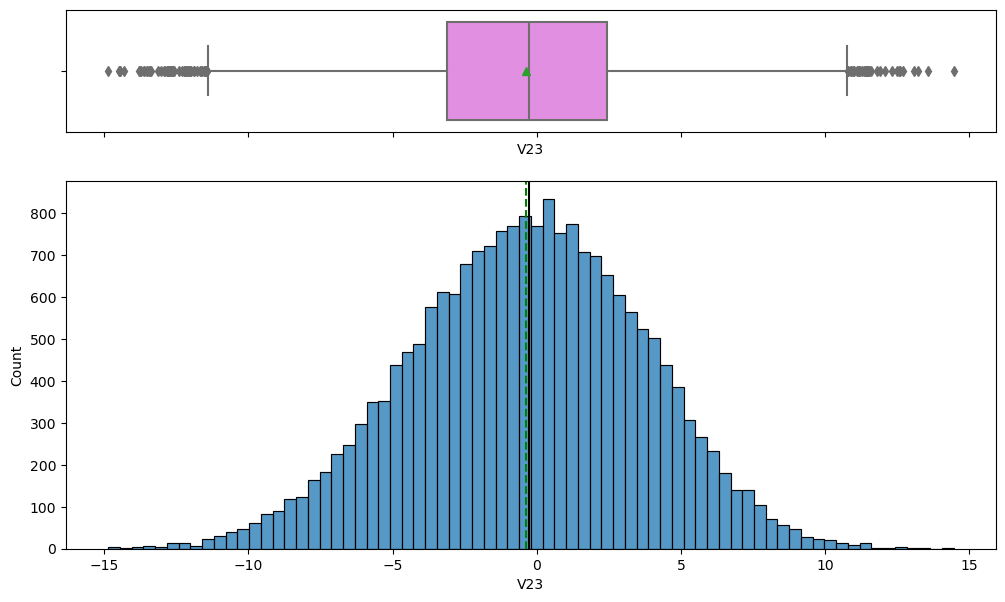

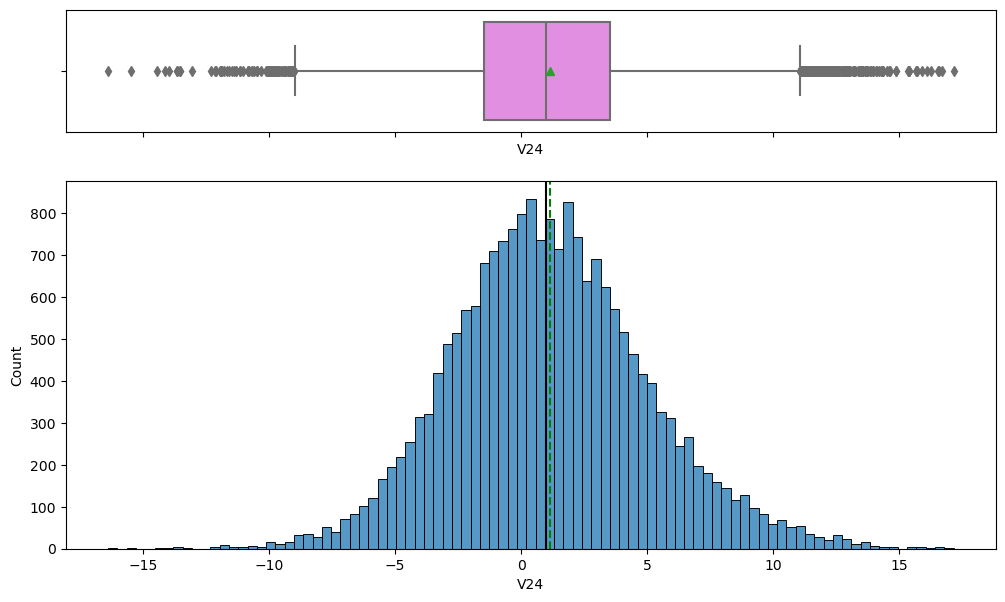

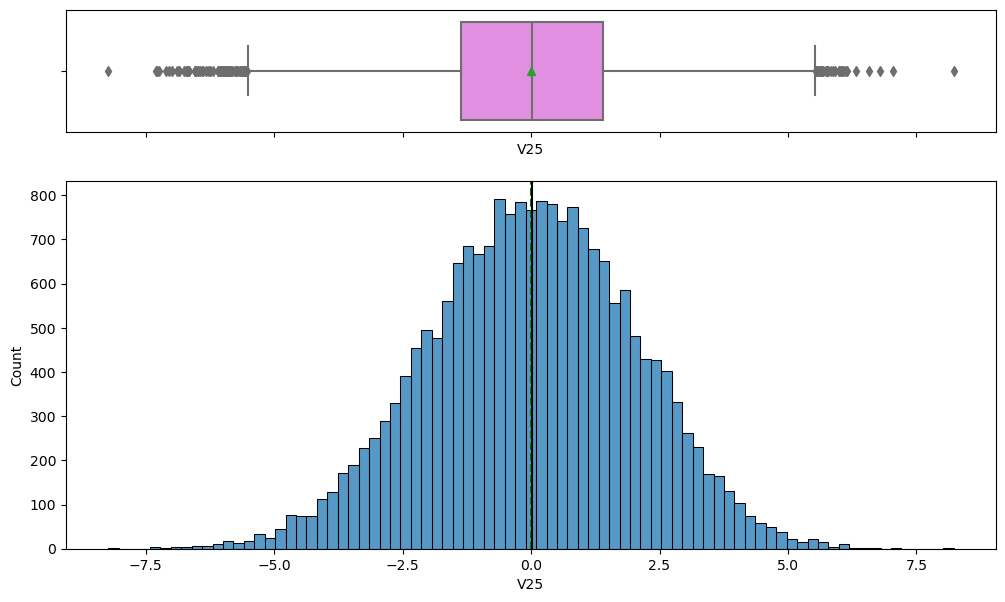

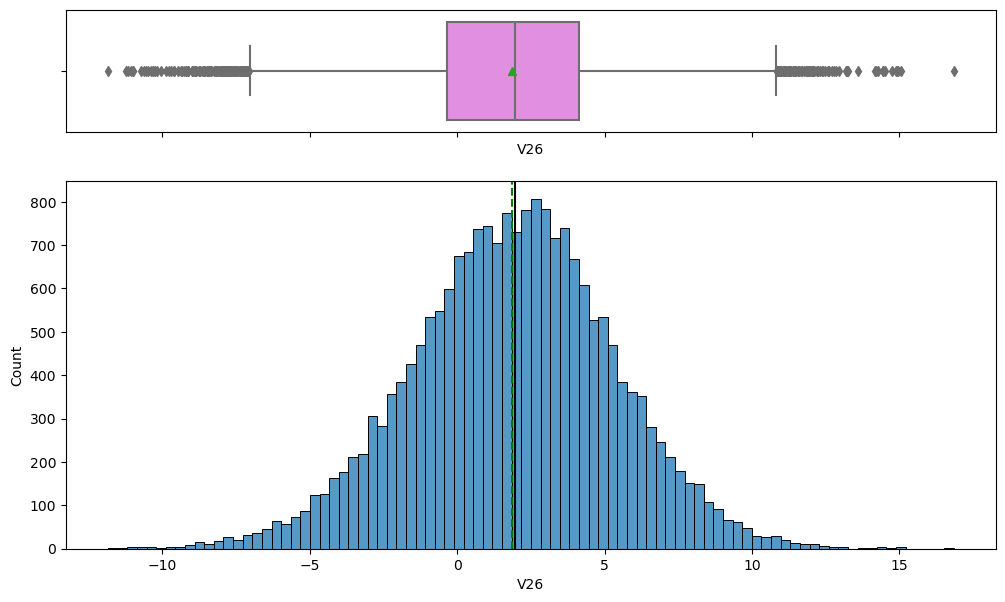

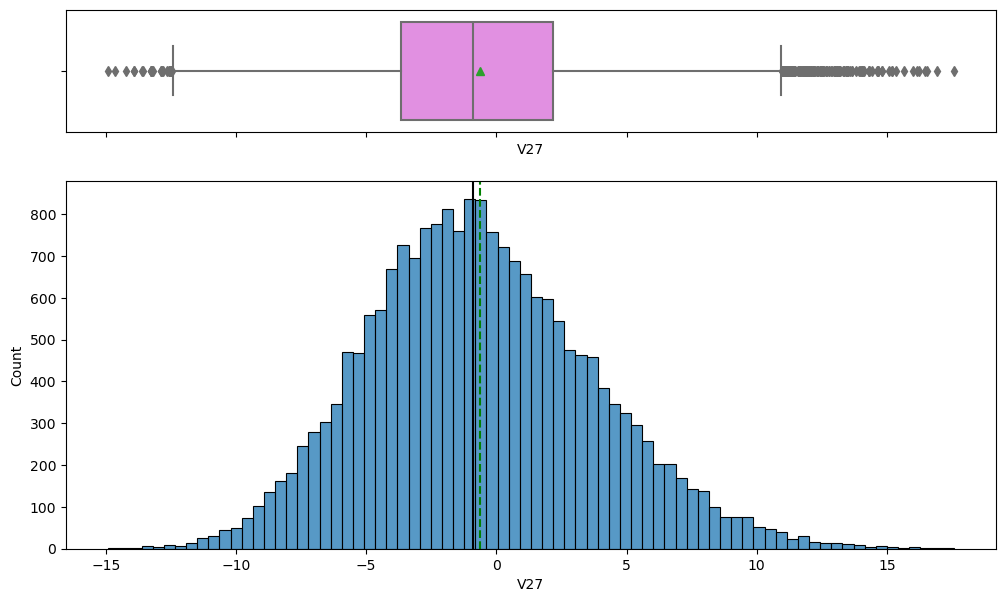

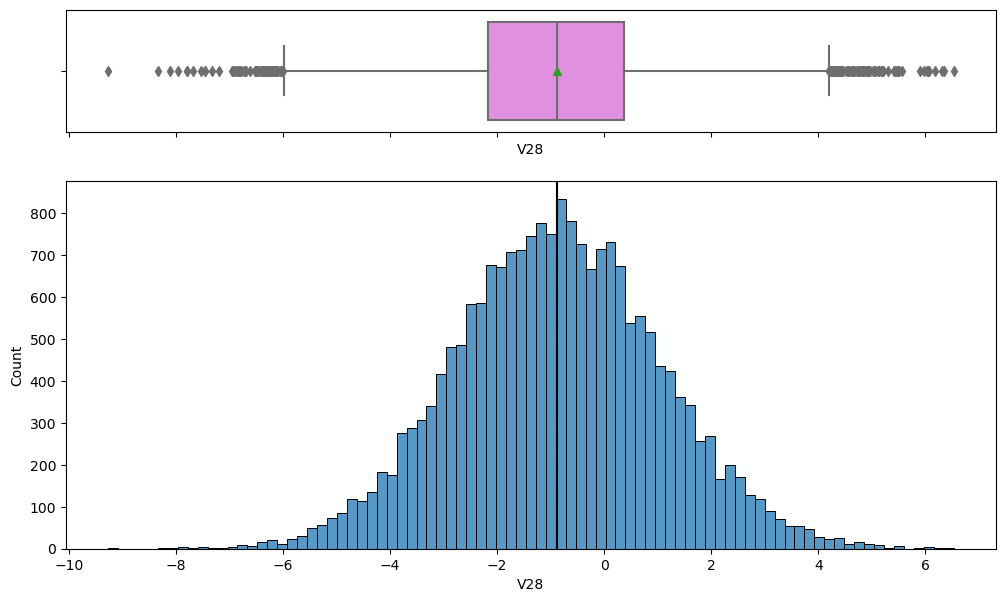

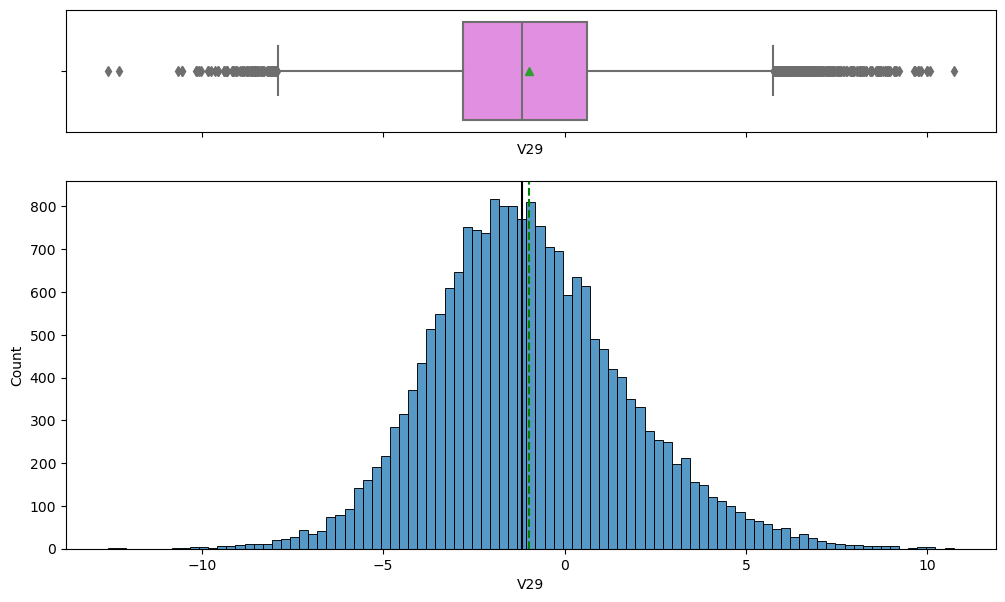

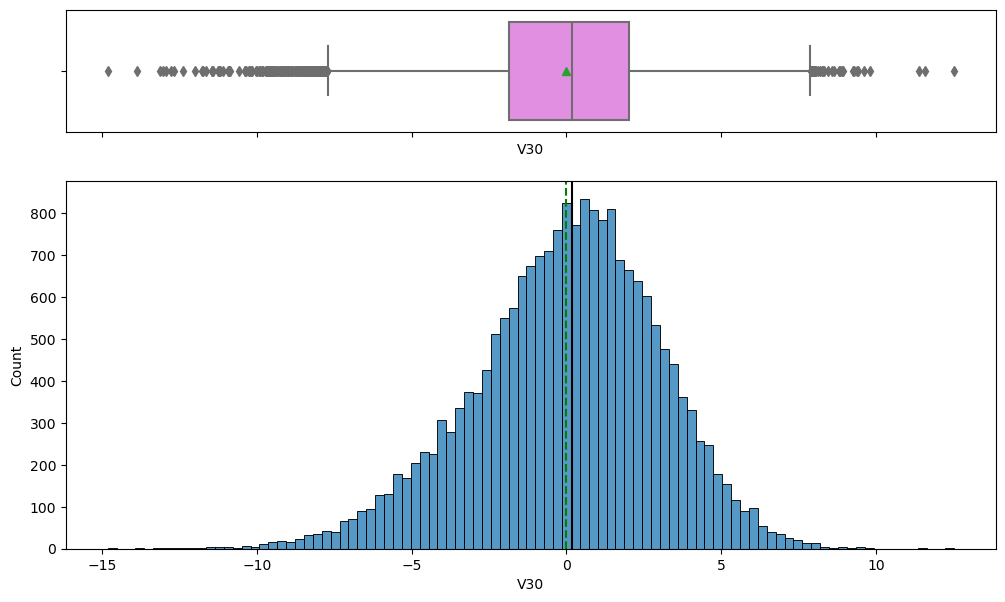

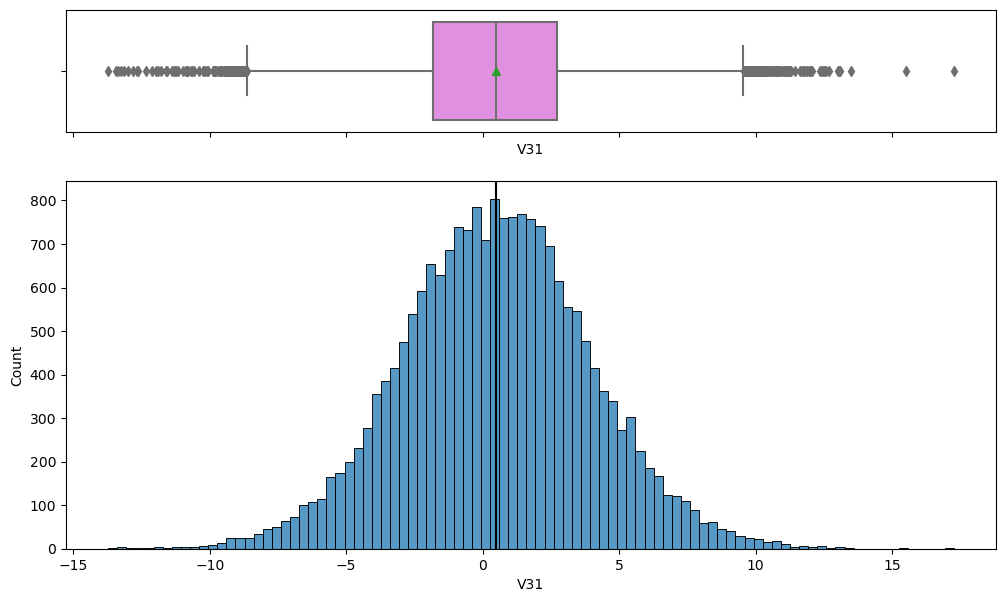

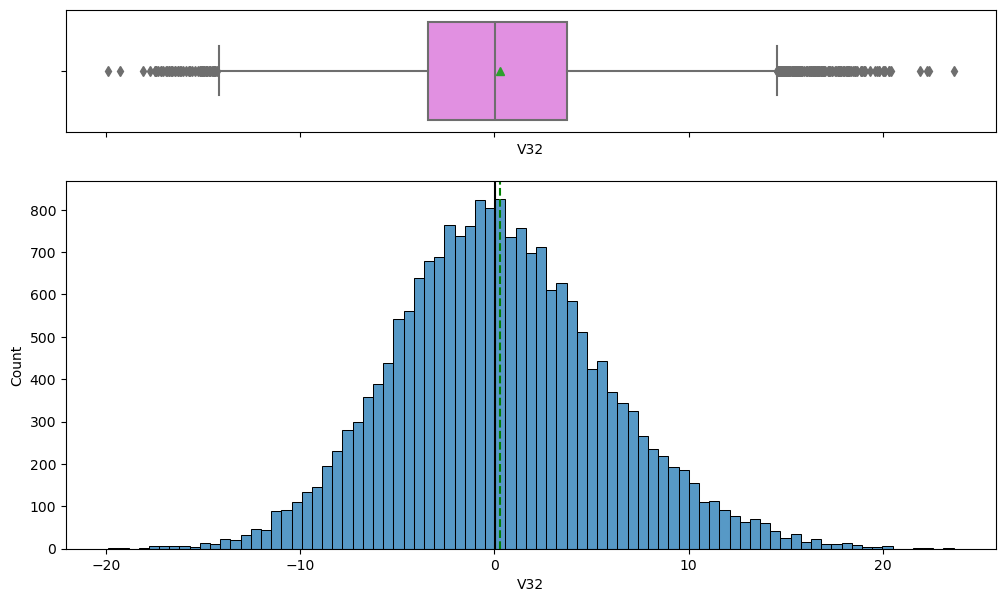

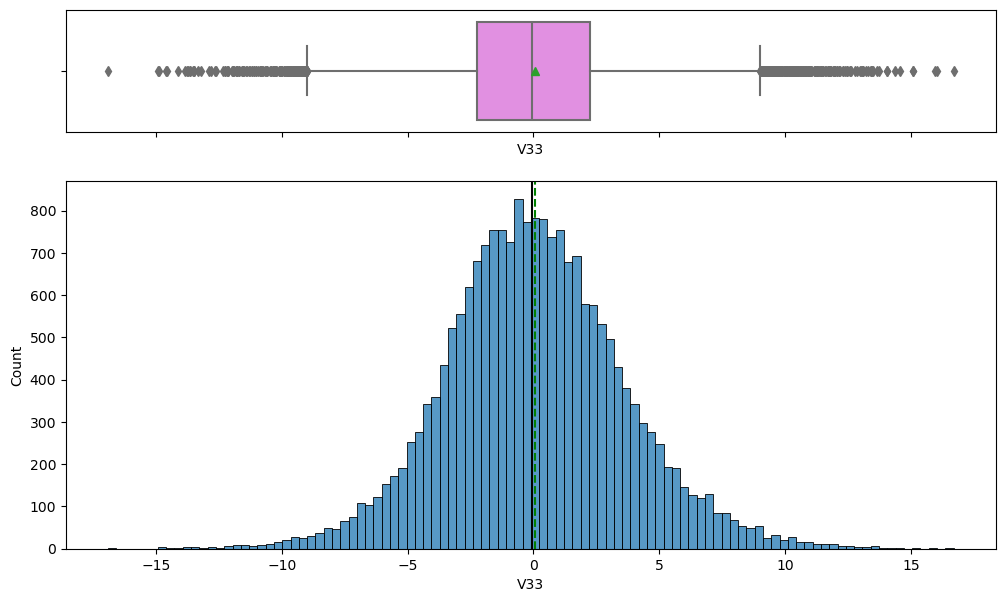

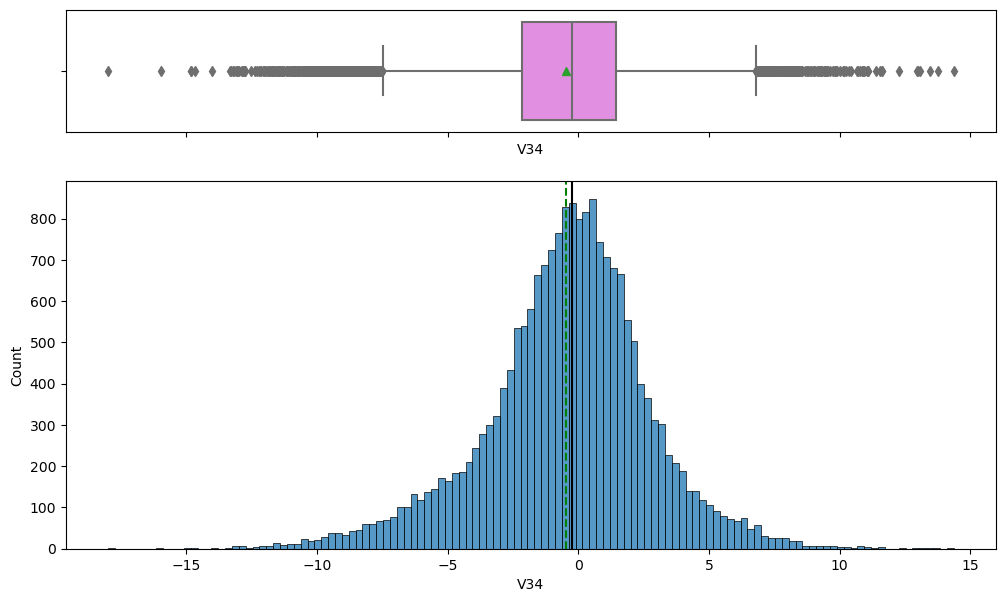

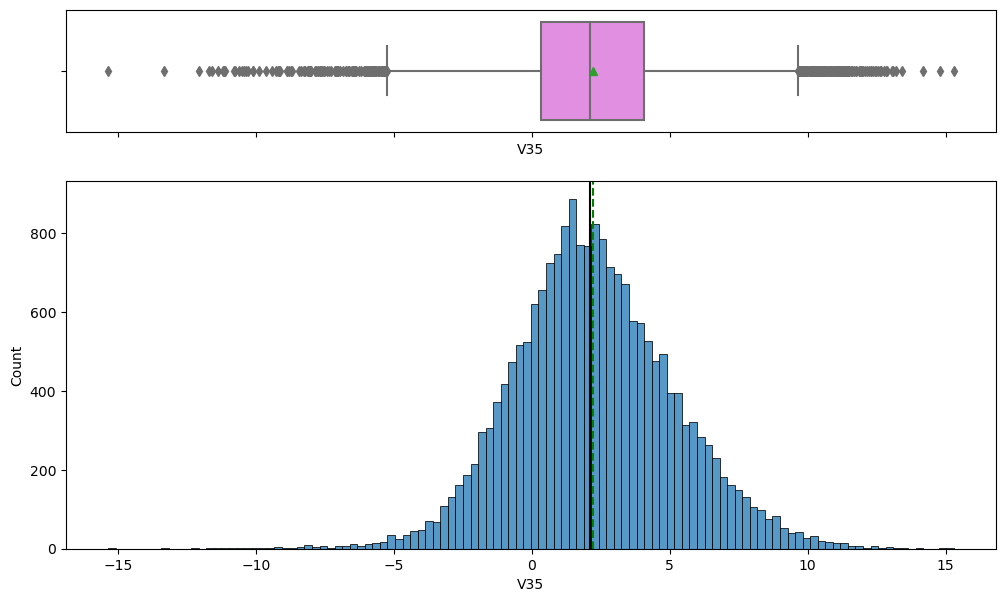

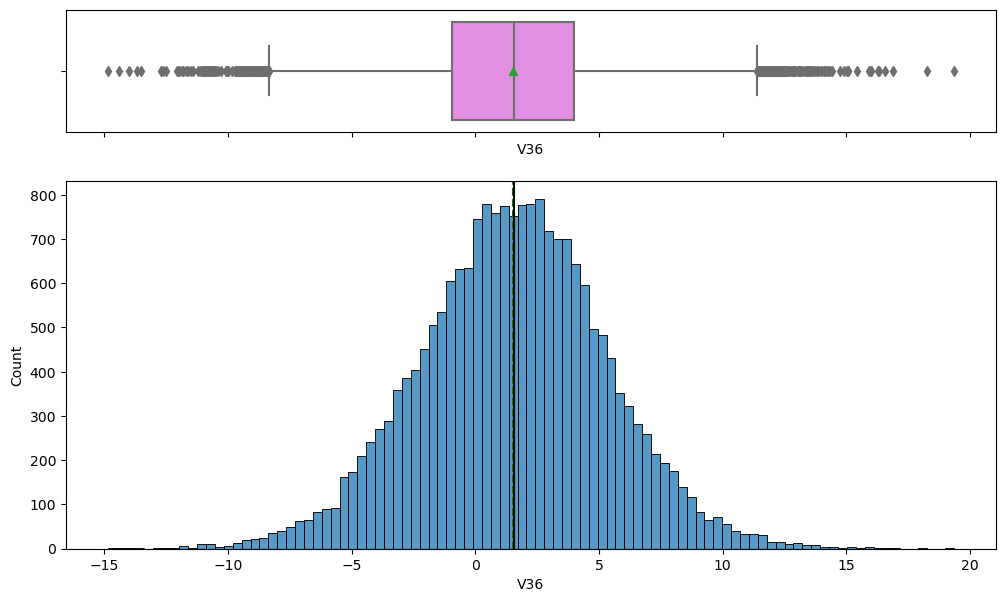

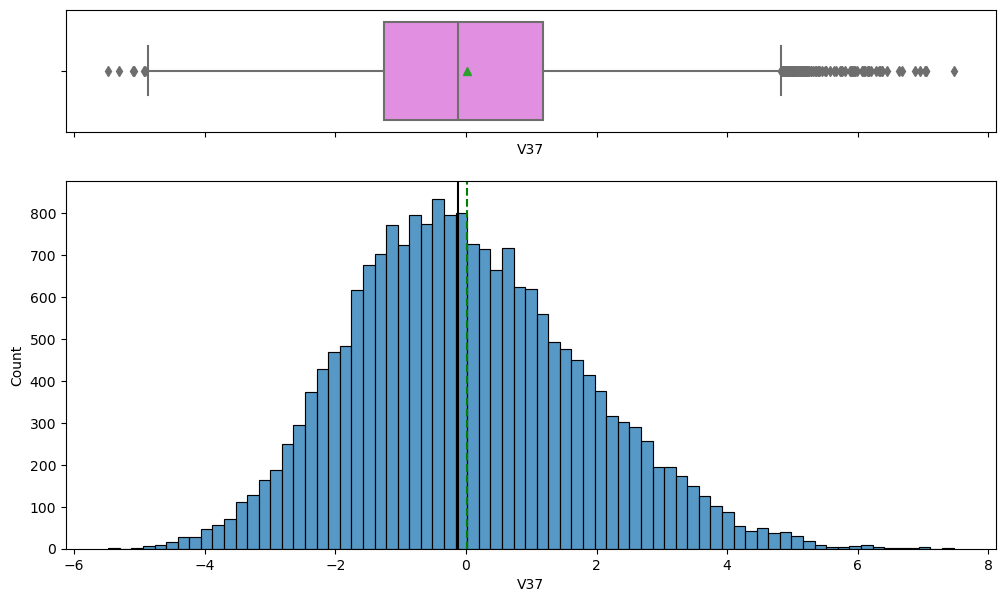

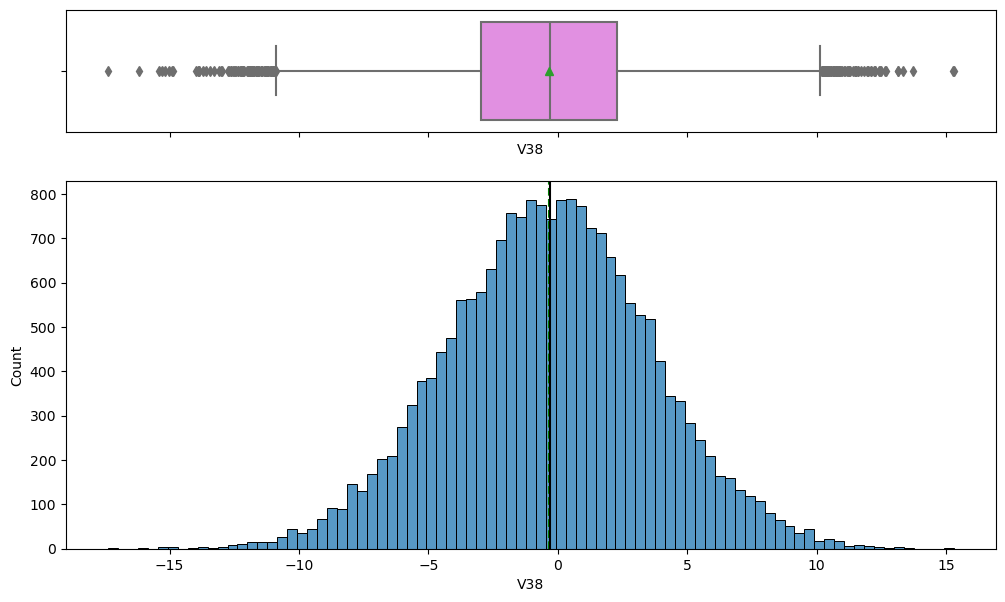

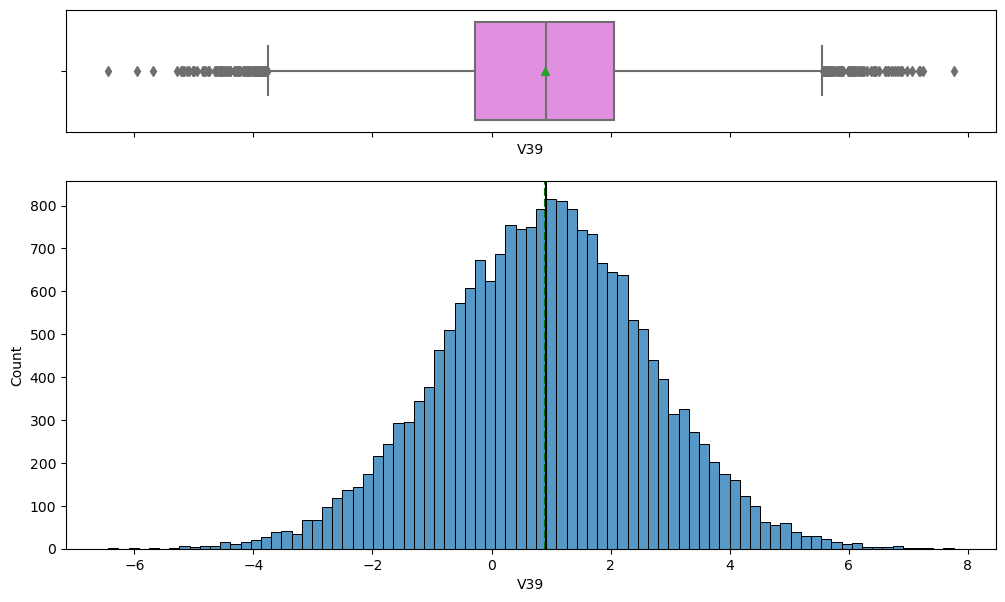

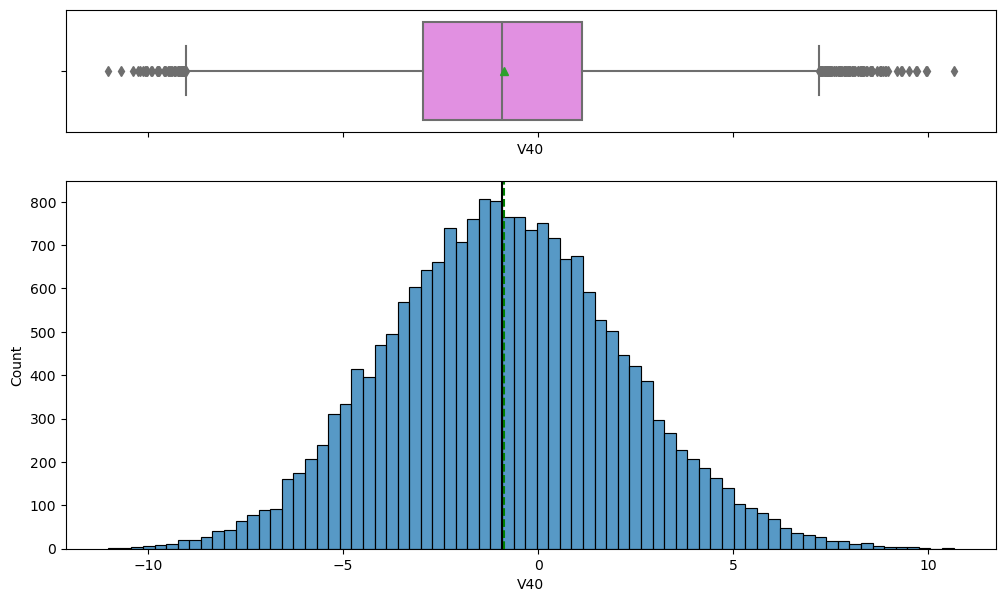

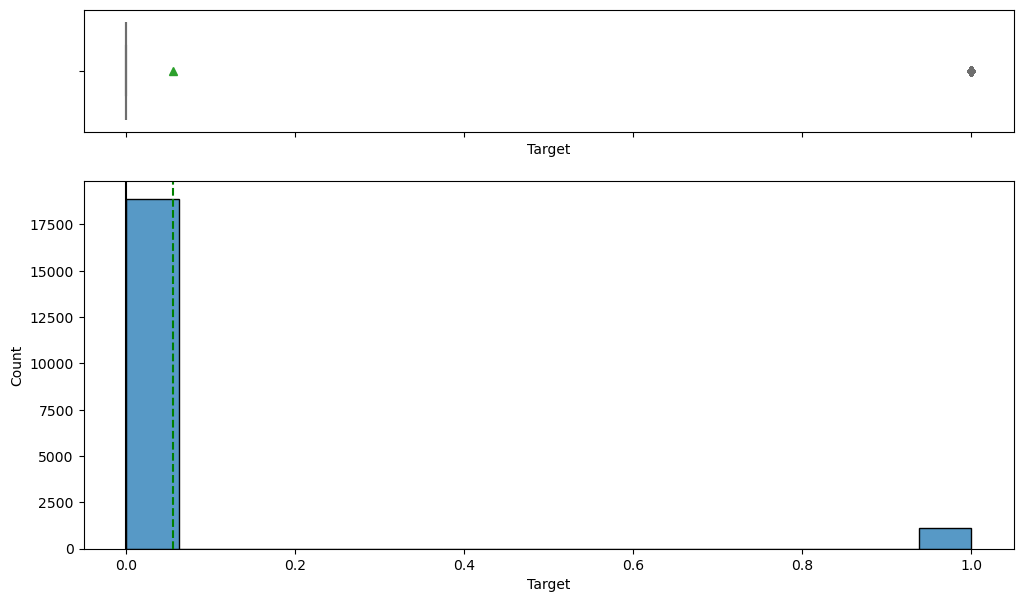

In [7]:
for feature in df.columns:
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None)

## Missing value imputation




In [8]:
# Replacing null values with the mean
df.fillna(df.mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      20000 non-null  float64
 1   V2      20000 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

## Data Pre-processing

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      20000 non-null  float64
 1   V2      20000 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

In [10]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,-0.271996,0.440430,2.484699,-0.083152,-0.053752,-0.995443,-0.879325,-0.548195,-0.016808,-0.012998,...,0.303799,0.049825,-0.462702,2.229620,1.514809,0.011316,-0.344025,0.890653,-0.875630,0.055500
std,3.440075,3.149366,3.388963,3.431595,2.104801,2.040970,1.761626,3.295756,2.160568,2.193201,...,5.500400,3.575285,3.183841,2.937102,3.800860,1.788165,3.948147,1.753054,3.012155,0.228959
min,-11.876451,-12.319951,-10.708139,-15.082052,-8.603361,-10.227147,-7.949681,-15.657561,-8.596313,-9.853957,...,-19.876502,-16.898353,-17.985094,-15.349803,-14.833178,-5.478350,-17.375002,-6.438880,-11.023935,0.000000
25%,-2.735778,-1.637431,0.206860,-2.347660,-1.535607,-2.347238,-2.030926,-2.642665,-1.494973,-1.411212,...,-3.420469,-2.242857,-2.136984,0.336191,-0.943809,-1.255819,-2.987638,-0.272250,-2.940193,0.000000
50%,-0.744240,0.468043,2.255786,-0.135241,-0.101952,-1.000515,-0.917179,-0.389085,-0.067597,0.100973,...,0.052073,-0.066249,-0.255008,2.098633,1.566526,-0.128435,-0.316849,0.919261,-0.920806,0.000000
75%,1.837349,2.542530,4.566165,2.130615,1.340480,0.380330,0.223695,1.722965,1.409203,1.477045,...,3.761722,2.255134,1.436935,4.064358,3.983939,1.175533,2.279399,2.057540,1.119897,0.000000
max,15.493002,13.089269,17.090919,13.236381,8.133797,6.975847,8.006091,11.679495,8.137580,8.108472,...,23.633187,16.692486,14.358213,15.291065,19.329576,7.467006,15.289923,7.759877,10.654265,1.000000


In [11]:
# Creating X and y tables to split out the dependent variable
X = df.drop(['Target'], axis=1)
y = df['Target']

In [12]:
# Splitting data into three sets - Train, Validation, and Test, starting with splitting out Test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# And now splitting out Train and Validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)

print(X_train.shape, X_val.shape, X_test.shape)

(12000, 40) (4000, 40) (4000, 40)


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [13]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
            
        },
        index=[0],
    )

    return df_perf

In [14]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [15]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

### Model Building with original data

Sample Decision Tree model building with original data 

In [16]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store CV scores
names = []  # Empty list to store model names

# Loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    # Setting number of splits equal to 5
    cv_result = cross_val_score(estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold)
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Bagging: 0.6951520592526091
Random forest: 0.7102457636628886
GBM: 0.7012007631017843
Adaboost: 0.6246661429693636
Xgboost: 0.7927729772191674
dtree: 0.7327236000448882

Validation Performance:

Bagging: 0.6891891891891891
Random forest: 0.7072072072072072
GBM: 0.7387387387387387
Adaboost: 0.6351351351351351
Xgboost: 0.7972972972972973
dtree: 0.7207207207207207


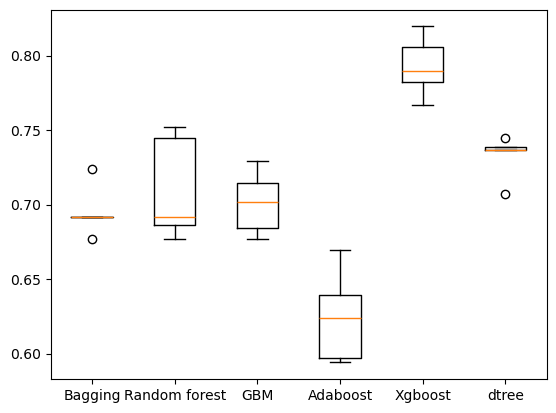

In [17]:
# Boxplots for CV scores of all models tested
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

It appears that the highest performing model is the XGBoost model followed by the Decision Tree. Random Forest is also close but has a higher variance.

### Model Building with Oversampled data


In [18]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [19]:
models_over = []  # Empty list to store all the models

# Appending models into the list
models_over.append(("Bagging", BaggingClassifier(random_state=1)))
models_over.append(("Random forest", RandomForestClassifier(random_state=1)))
models_over.append(("GBM", GradientBoostingClassifier(random_state=1)))
models_over.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models_over.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models_over.append(("dtree", DecisionTreeClassifier(random_state=1)))

results_over = []  # Empty list to store CV scores
names_over = []  # Empty list to store model names

# Loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models_over:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    # Setting number of splits equal to 5
    cv_result_over = cross_val_score(estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold)
    results_over.append(cv_result_over)
    names_over.append(name)
    print("{}: {}".format(name, cv_result_over.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models_over:
    model.fit(X_train_over, y_train_over)
    scores_over = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_over))


Cross-Validation performance on training dataset:

Bagging: 0.9762662881334749
Random forest: 0.9850009207669347
GBM: 0.9241221470338262
Adaboost: 0.8959765404936946
Xgboost: 0.9915299953942187
dtree: 0.9693842074260146

Validation Performance:

Bagging: 0.7972972972972973
Random forest: 0.8333333333333334
GBM: 0.8828828828828829
Adaboost: 0.8603603603603603
Xgboost: 0.8603603603603603
dtree: 0.7387387387387387


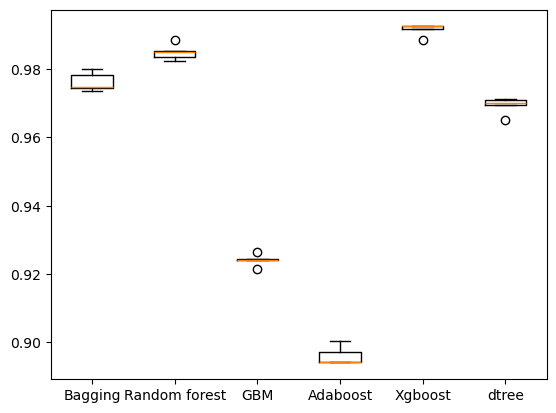

In [20]:
# Boxplots for CV scores of all models tested with overfit
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(results_over)
ax.set_xticklabels(names_over)
plt.show()

### Model Building with Undersampled data

In [21]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [22]:
models_un = []  # Empty list to store all the models

# Appending models into the list
models_un.append(("Bagging", BaggingClassifier(random_state=1)))
models_un.append(("Random forest", RandomForestClassifier(random_state=1)))
models_un.append(("GBM", GradientBoostingClassifier(random_state=1)))
models_un.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models_un.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models_un.append(("dtree", DecisionTreeClassifier(random_state=1)))

results_un = []  # Empty list to store CV scores
names_un = []  # Empty list to store model names

# Loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models_un:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    # Setting number of splits equal to 5
    cv_result_un = cross_val_score(estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold)
    results_un.append(cv_result_un)
    names_un.append(name)
    print("{}: {}".format(name, cv_result_un.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models_un:
    model.fit(X_train_un, y_train_un)
    scores_un = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_un))


Cross-Validation performance on training dataset:

Bagging: 0.8559084277858826
Random forest: 0.8934238581528448
GBM: 0.8904500056110425
Adaboost: 0.8694422623723487
Xgboost: 0.882919986533498
dtree: 0.8303445180114466

Validation Performance:

Bagging: 0.8963963963963963
Random forest: 0.9099099099099099
GBM: 0.9009009009009009
Adaboost: 0.8873873873873874
Xgboost: 0.8963963963963963
dtree: 0.8873873873873874


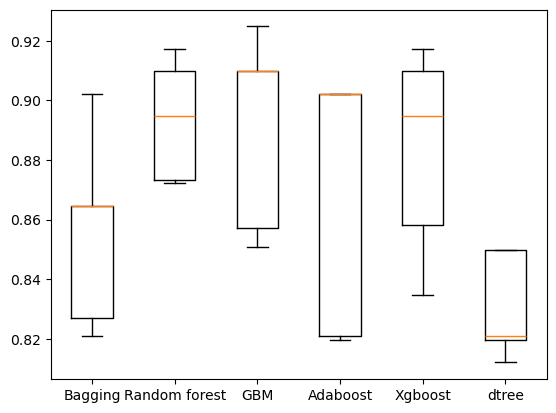

In [23]:
# Boxplots for CV scores of all models tested with underfit
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(results_un)
ax.set_xticklabels(names_un)
plt.show()

## HyperparameterTuning 

The three top models are XG Boost, Decision Tree, and Random Forest. Those will be tuned below.

### XG Boost

#### Grid Search

In [24]:
model = XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in Grid Search
param_grid = {'n_estimators': [150, 200, 250],
              'scale_pos_weight': [5,10], 
              'learning_rate' : [0.1,0.2],
              'gamma': [0,3,5],
              'subsample': [0.8,0.9] }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print("Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

Best Parameters:{'gamma': 5, 'learning_rate': 0.1, 'n_estimators': 200, 'scale_pos_weight': 10, 'subsample': 0.8} 
Score: 0.8423521490292896


In [25]:
# Creating new model with optimized parameters
xgb_tuned = XGBClassifier(
    random_state=1
    ,eval_metric="logloss"
    ,gamma=5
    ,learning_rate=0.1
    ,n_estimators=200
    ,scale_pos_weight=10
    ,subsample=0.8
)

# Fit the model on train data
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=5, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

In [26]:
# Training Performance
xgb_grid_train = model_performance_classification_sklearn(xgb_tuned, X_train, y_train)

print("Training performance:")
xgb_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.999333,1.0,0.988131,0.99403


In [27]:
# Validation comparison
xgb_grid_val = model_performance_classification_sklearn(xgb_tuned, X_val, y_val)

print("Validation performance:")
xgb_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.98875,0.842342,0.949239,0.892601


#### Random Search

In [28]:
# defining model
model = XGBClassifier(random_state=1, eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators': [150, 200, 250],
              'scale_pos_weight': [5,10], 
              'learning_rate' : [0.1,0.2],
              'gamma': [0,3,5],
              'subsample': [0.8,0.9] }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_tuned1 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned1.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned1.best_params_,xgb_tuned1.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.8423521490292896:


Best parameters match the Grid Search results, no need to recreate the model again.

### Decision Tree

#### Grid Search

In [29]:
model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in Grid Search
param_grid = {'max_depth': np.arange(2,6)
              ,'min_samples_leaf': [1, 4, 7]
              ,'max_leaf_nodes': [10, 15]
              ,'min_impurity_decrease': [0.0001,0.001] }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
dtree_grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
dtree_grid_cv.fit(X_train, y_train)

print("Best Parameters:{} \nScore: {}".format(dtree_grid_cv.best_params_, dtree_grid_cv.best_score_))

Best Parameters:{'max_depth': 5, 'max_leaf_nodes': 15, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 1} 
Score: 0.5361463359892268


In [30]:
# Creating new model with optimized parameters
dtree_tuned = DecisionTreeClassifier(
    random_state=1
    ,max_depth=5
    ,max_leaf_nodes=15
    ,min_impurity_decrease=0.0001
    ,min_samples_leaf=1
)

# Fit the model on train data
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, random_state=1)

In [31]:
# Training Performance
dtree_grid_train = model_performance_classification_sklearn(dtree_tuned, X_train, y_train)

print("Training performance:")
dtree_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.9745,0.594595,0.916667,0.721311


In [32]:
# Validation comparison
dtree_grid_val = model_performance_classification_sklearn(dtree_tuned, X_val, y_val)

print("Validation performance:")
dtree_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.96975,0.540541,0.863309,0.66482


#### Random Search

In [33]:
# defining model
model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in Random Search
param_grid = {'max_depth': np.arange(2,6)
              ,'min_samples_leaf': [1, 4, 7]
              ,'max_leaf_nodes': [10, 15]
              ,'min_impurity_decrease': [0.0001,0.001] }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
dtree_tuned1 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
dtree_tuned1.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(dtree_tuned1.best_params_,dtree_tuned1.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.5361463359892268:


As with XG Boost, the Decision Tree hyperparameters are the same between Grid Search and Random Search - no need to build the model again.

### Random Forest

#### Grid Search

In [34]:
model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in Grid Search
param_grid = {'n_estimators': [200,250,300]
              ,'min_samples_leaf': np.arange(1, 4)
              ,'max_features': [np.arange(0.3, 0.6, 0.1),'sqrt']
              ,'max_samples': np.arange(0.4, 0.7, 0.1) }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
forest_grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
forest_grid_cv.fit(X_train, y_train)

print("Best Parameters:{} \nScore: {}".format(forest_grid_cv.best_params_, forest_grid_cv.best_score_))

Best Parameters:{'max_features': 'sqrt', 'max_samples': 0.6, 'min_samples_leaf': 1, 'n_estimators': 250} 
Score: 0.6891819099988779


In [35]:
# Creating new model with optimized parameters
random_tuned = RandomForestClassifier(
    random_state=1
    ,max_features='sqrt'
    ,max_samples=0.6
    ,min_samples_leaf=1
    ,n_estimators=250
)

# Fit the model on train data
random_tuned.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.6, n_estimators=250, random_state=1)

In [38]:
# Training Performance
random_grid_train = model_performance_classification_sklearn(random_tuned, X_train, y_train)

print("Training performance:")
random_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.994667,0.903904,1.0,0.949527


In [39]:
# Validation comparison
random_grid_val = model_performance_classification_sklearn(random_tuned, X_val, y_val)

print("Validation performance:")
random_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.982,0.675676,1.0,0.806452


#### Random Search

In [40]:
model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in Grid Search
param_grid = {'n_estimators': [200,250,300]
              ,'min_samples_leaf': np.arange(1, 4)
              ,'max_features': [np.arange(0.3, 0.6, 0.1),'sqrt']
              ,'max_samples': np.arange(0.4, 0.7, 0.1) }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
random_tuned1 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
random_tuned1.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(random_tuned1.best_params_,random_tuned1.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.6891819099988779:


As with XG Boost and Decision Tree, hyperparameters are the same between Grid Search and Random Search - no need to build the model again.

## Model performance comparison and choosing the final model

In [42]:
# Performance Comparison Grid

models_train_comp_df = pd.concat(
    [xgb_grid_train.T
     ,dtree_grid_train.T
     ,random_grid_train.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "XG Boost Tuned with Grid search"
    ,"Decision Tree Tuned with Grid search"
    ,"Random Forest Tuned with Grid search"
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,XG Boost Tuned with Grid search,Decision Tree Tuned with Grid search,Random Forest Tuned with Grid search
Accuracy,0.999333,0.974500,0.994667
Recall,1.000000,0.594595,0.903904
Precision,0.988131,0.916667,1.000000
F1,0.994030,0.721311,0.949527


In [43]:
# Performance Comparison Grid

models_train_comp_df = pd.concat(
    [xgb_grid_val.T
     ,dtree_grid_val.T
     ,random_grid_val.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "XG Boost Tuned with Grid search"
    ,"Decision Tree Tuned with Grid search"
    ,"Random Forest Tuned with Grid search"
]

print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,XG Boost Tuned with Grid search,Decision Tree Tuned with Grid search,Random Forest Tuned with Grid search
Accuracy,0.988750,0.969750,0.982000
Recall,0.842342,0.540541,0.675676
Precision,0.949239,0.863309,1.000000
F1,0.892601,0.664820,0.806452


As our goal is to maximize recall, the XG Boost model using Grid Search is the optimal model.

### Test set final performance

In [46]:
# Test comparison
xgb_grid_test = model_performance_classification_sklearn(xgb_tuned, X_test, y_test)

print("Test performance:")
xgb_grid_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.98775,0.851351,0.921951,0.885246


## Pipelines to build the final model


In [51]:
# Creating X and y tables to split out the dependent variable
X = df.drop(['Target'], axis=1)
y = df['Target']

# Using the list function to get a list of the columns (which all happen to be numeric)
features = list(X.columns.values)

# Transformer takes all columns and applies an imputer to impute the mean
transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean'))])

# Apply numerical transformer using a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", transformer, features)
    ],
    remainder="passthrough"
)

In [54]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

print(X_train.shape, X_test.shape)

(14000, 40) (6000, 40)


In [55]:
# Creating the final pipeline model
final_pipeline_model = Pipeline(
    steps=[
        ('pre', preprocessor)
        ,(
            'XGB'
            ,XGBClassifier(
                random_state=1
                ,eval_metric="logloss"
                ,gamma=5
                ,learning_rate=0.1
                ,n_estimators=200
                ,scale_pos_weight=10
                ,subsample=0.8
            ),
        ),
    ]
)
# Fit the model on training data
final_pipeline_model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['V1', 'V2', 'V3', 'V4', 'V5',
                                                   'V6', 'V7', 'V8', 'V9',
                                                   'V10', 'V11', 'V12', 'V13',
                                                   'V14', 'V15', 'V16', 'V17',
                                                   'V18', 'V19', 'V20', 'V21',
                                                   'V22', 'V23', 'V24', 'V25',
                                                   'V26', 'V27', 'V28', 'V29',
                                                   'V30', ...])])),
                ('XGB',
                 XGBClassifier(base_score=None,...
                               feature_types=None, gamma=5, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=200,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=1, ...))])

In [56]:
# Running the metrics for the final test model
Test_Score = model_performance_classification_sklearn(final_pipeline_model, X_test, y_test)

print("Final Model Performance on Test Dataset:")
Test_Score

Final Model Performance on Test Dataset:


,Accuracy,Recall,Precision,F1
0,0.9895,0.861862,0.944079,0.901099


# Business Insights and Conclusions

***

Though it's difficult to draw conclusions on the data without knowing what the data actually is, we can draw conclusions on the results of the tests. It's unsurprising to find that the XG Boost model has the highest recall due to it generally being considered a very strong model builder (the only drawback being that it can be resource intensive). I plan on incorporating what I've learned about pipelines into the work I do for my day to day job and apprciate the practice.